# Xns11

[`Xns11`](../api/Xns11.html#mikeio1d.Xns11) is the main interface for
accessing cross section data.

## Opening files

In [1]:
from mikeio1d import Xns11
xns = Xns11('../data/mikep_cs_demo.xns11')
xns

<mikeio1d.Xns11 (103)>

## Cross section collections

Each [`Xns11`](../api/Xns11.html#mikeio1d.Xns11) object is a collection
of cross sections
([`CrossSectionCollection`](../api/cross_sections.CrossSectionCollection.html#mikeio1d.cross_sections.CrossSectionCollection))
with a file path.

In [2]:
from mikeio1d.cross_sections import CrossSectionCollection

print(xns.file_path)

isinstance(xns, CrossSectionCollection)

../data/mikep_cs_demo.xns11

True

### Overview

An overview of a cross section collection can be obtained by calling the
[`to_dataframe`](../api/Xns11.html#mikeio1d.Xns11.to_dataframe) method.

In [3]:
xns.to_dataframe()

103 rows × 1 columns

### Indexing

Cross section collections are dict-like and can be indexed by a tuple of
location ID, chainage, and topo ID. The values are
[`CrossSection`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection)
objects.

In [4]:
xns['basin_left1', '122.042', '1']

<CrossSection: basin_left1, 122.042, 1>

Alternatively, the location ID, chainage, and topo ID can be explicitly
expressed with the [`sel`](../api/Xns11.html#mikeio1d.Xns11.sel) method.

In [5]:
xns.sel(location_id='basin_left1', chainage='122.042', topo_id='1')

<CrossSection: basin_left1, 122.042, 1>

### Slicing

Cross section collections can be sliced by location ID, chainage, or
topo ID. This returns a list of
[`CrossSection`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection)
objects.

In [6]:
xns['basin_left1'] # all cross sections at location 'basin_left1'

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

In [7]:
xns[:, '122.042'] # all cross sections at chainage '122.042'

[<CrossSection: basin_left1, 122.042, 1>]

In [8]:
xns[:,:,'1'] # all cross sections with topo ID '1'

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>,
 <CrossSection: basin_left2, 29.194, 1>,
 <CrossSection: basin_left2, 94.137, 1>,
 <CrossSection: basin_left2, 159.062, 1>,
 <CrossSection: basin_left2, 214.431, 1>,
 <CrossSection: basin_left2, 281.473, 1>,
 <CrossSection: basin_left2, 341.557, 1>,
 <CrossSection: basin_left2, 398.991, 1>,
 <CrossSection: basin_left2, 434.188, 1>,
 <CrossSection: basin_right, 0.000, 1>,
 <CrossSection: basin_right, 69.014, 1>,
 <CrossSection: basin_right, 122.513, 1>,
 <CrossSection: basin_right, 182.271, 1>,
 

### Combining

Cross section collections can be combined into a new collection.

In [9]:
sections = [*xns['basin_left1', '2.004'], *xns['basin_left1', '210.212']]
new_collection = Xns11(sections)
new_collection.to_dataframe()

### Adding a cross section

A new cross section can be added to a collection with the
[`add`](../api/Xns11.html#mikeio1d.Xns11.add) method.

In [10]:
xs_to_add = xns.sel(location_id='basin_left1', chainage='33.774', topo_id='1')
new_collection.add(xs_to_add)
new_collection.to_dataframe()

## Cross sections

A cross section is uniquely identified by its location ID, chainage, and
topo ID.

In [11]:
xs = xns['basin_left1', '122.042', '1']
xs

<CrossSection: basin_left1, 122.042, 1>

### Plotting

Cross sections can be plotted directly with the
[`plot`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.plot)
method.

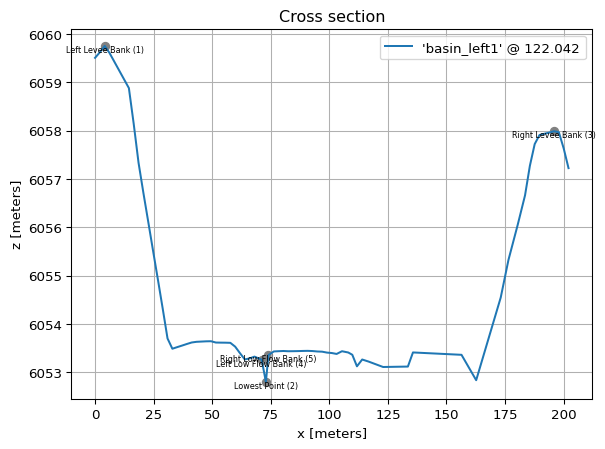

In [12]:
xs.plot()

### Raw data

The raw data of a cross section can be accessed via the
[`raw`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.raw)
attribute.

In [13]:
df = xs.raw
df.head()

Raw data is modifiable by setting the
[`raw`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.raw)
attribute with a new DataFrame of the same column names.

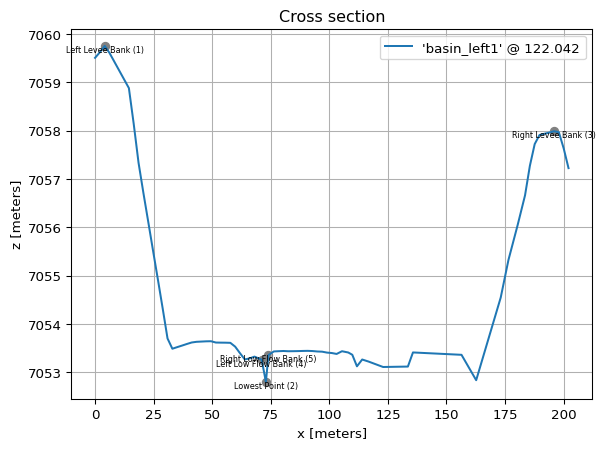

In [14]:
df_modified = xs.raw
df_modified['z'] = df_modified['z'] + 1000
xs.raw = df_modified
xs.plot()

### Markers

Markers can be viewed with the
[`markers`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.markers)
attribute.

In [15]:
xs.markers

Set and unset markers with the
[`set_marker`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.set_marker)
and
[`unset_marker`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.unset_marker)
methods. Alternatively, reassign a modified marker DataFrame like is
done for raw data.

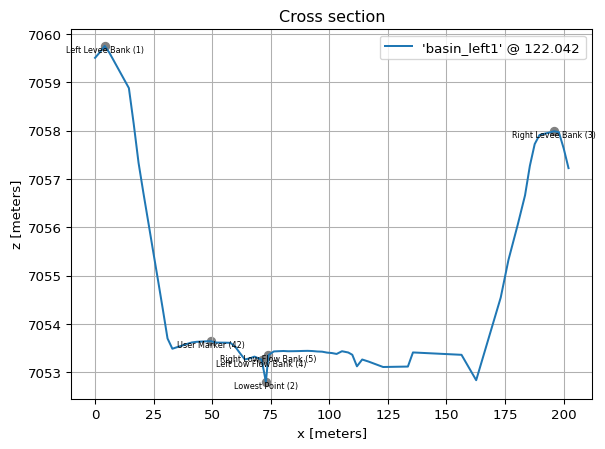

In [16]:
xs.set_marker(42, 50) # set a user-defined marker '42' at the closest point to x=50
xs.plot()

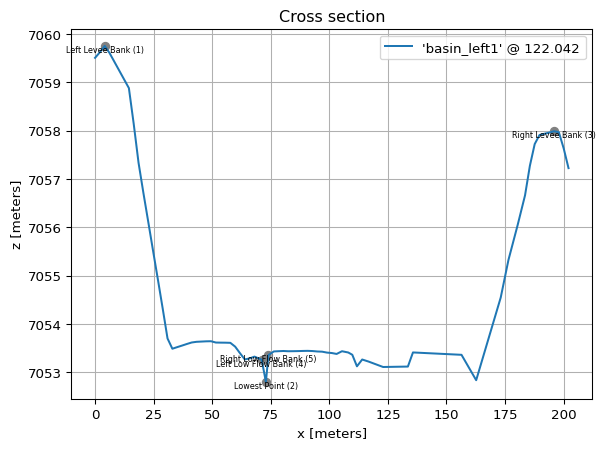

In [17]:
xs.unset_marker(42) # unset the user-defined marker '42'
xs.plot()

### Processed data

Processed data is accessible via the
[`processed`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.processed)
attribute.

In [18]:
df = xs.processed
df.head()

Processed data is modifiable by setting the
[`processed`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.processed)
attribute with a new DataFrame of the same column names.

In [19]:
df_modified = xs.processed
df_modified['level'] = df_modified['level'] -500
xs.processed = df_modified
xs.processed.head()

To recalculate processed datd based on the raw data, call the
[`recompute_processed`](../api/cross_sections.CrossSection.html#mikeio1d.cross_sections.CrossSection.recompute_processed)
method.

In [20]:
xs.processed_allow_recompute = True
xs.recompute_processed()
xs.processed.head()

## GeoDataFrames

Cross section collections can be extracted into a GeoDataFrame with
[`to_geopandas`](../api/Xns11.html#mikeio1d.Xns11.to_geopandas).

In [21]:
gdf = xns.to_geopandas()
gdf.head()

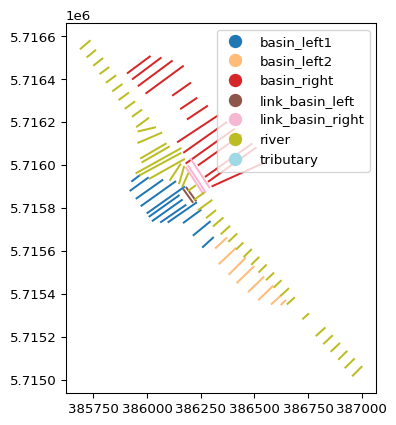

In [22]:
gdf.plot(column='location_id', cmap='tab20', legend=True)

It is also possible to extract cross section markers as GeoDataFrames.

In [23]:
gdf = xns.to_geopandas(mode='markers')
gdf.head()

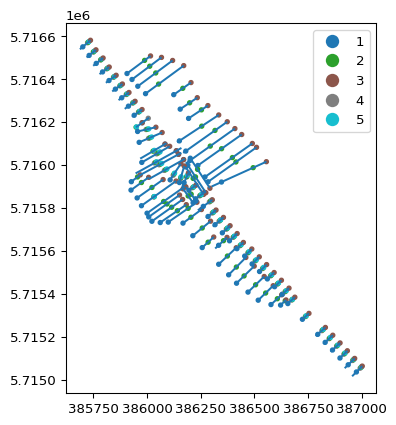

In [24]:
ax = xns.to_geopandas().plot()
xns.to_geopandas(mode='markers').plot(ax=ax, column='marker', markersize=9, legend=True)

## Examples

-   [Xns11 Basics](../examples/xns11_basic.qmd)

> **Tip**
>
> There are also several notebook examples available on our [GitHub
> repository]()https://github.com/DHI/mikeio1d/tree/main/notebooks.